# Covalent API Testing


In [ ]:
import json
import requests

In [ ]:
# with open('../api_keys.json', 'r') as json_file:
#     keys = json.load(json_file)
#     covalent_key = key = keys['covalent']
# #     gecko_key = keys['coingecko']

key = 'ckey_9cda6824fa45468f808ca8c0c0e'

In [ ]:
eth_url = 'https://api.covalenthq.com/v1/1/address/0x89d9Dd2e85ecC305E276f51BB21fd4C708Be9487/balances_v2/?&key=%s' % key
matic_url = 'https://api.covalenthq.com/v1/137/address/0x89d9Dd2e85ecC305E276f51BB21fd4C708Be9487/balances_v2/?&key=%s' % key
avax_url = 'https://api.covalenthq.com/v1/43114/address/0x89d9Dd2e85ecC305E276f51BB21fd4C708Be9487/balances_v2/?&key=%s' % key
bsc_url = 'https://api.covalenthq.com/v1/56/address/0x89d9Dd2e85ecC305E276f51BB21fd4C708Be9487/balances_v2/?&key=%s' % key

## Cleaning Data

In [ ]:
import json
import requests
import pandas as pd 
# import json_normalize

# with open('api_key.json', 'r') as json_file:
#     keys = json.load(json_file)
#     covalent_key = key = keys['covalent']


#1.1 Get tokens per EOA address: 

def fetch_wallet_tokens(address, chain_id):

    url = f'https://api.covalenthq.com/v1/{chain_id}/address/{address}/balances_v2/?&key=%s' % key

    r = requests.get(url, {'key':key})
    r.json()
    print(r.json())

    df = pd.DataFrame(r.json())

    pd.set_option('display.max_rows', None)
    pd.set_option('display.max_columns', None)
    pd.set_option('display.width', 1000)
    pd.set_option('display.colheader_justify', 'center')
    pd.set_option('display.precision', 3)

    print(df) 

fetch_wallet_tokens('0xAb5801a7D398351b8bE11C439e05C5B3259aeC9B', 1)

#trying shit to present json into readable dataframe: 
#df2 = pd.json_normalize(r.json(), record_path = ['data'])
#print(df2)
#print(df2)
#df_nested_list = pd.json_normalize(data, record_path =['students'])



#1.2 Get holders's addresses for a contract address (ERC-20)

def fetch_token_holders(address, chain_id):

    url= f'https://api.covalenthq.com/v1/{chain_id}/tokens/{address}/token_holders/?&key=%s' % key

    r2 = requests.get(url, {'key':key})
    r2.json()
    print(r2.json())

    df2 = pd.DataFrame(r2.json())
    print(df2)
    
    return r2, df2


json_result, token_holders = fetch_token_holders('0x35bd01fc9d6d5d81ca9e055db88dc49aa2c699a8', 1)



#2. Construct useful data tables 

#2.1 Create DF



#3. Analysis  

# ENTER DAO token. Output: 

#3.1 Total DAO power 
#3.2 Total DAO power per capita 
#3.3 Number of Holders 
#3.4 Table of tokens held/ total holdings of that token/ % wrt total DAO power (i.e. value of total holdings of members)
#3.4 Categories of tokens holdings
#3.5 Age of member's addresses = some statistics (Average)

In [ ]:
holders = json_result.json()

In [ ]:
columns = ['address','balance']
total_df = pd.DataFrame(columns=columns)

for holder in holders['data']['items']:
    total_df = total_df.append(pd.DataFrame([[holder['address'], holder['balance']]], columns=columns))

total_df.reset_index(drop=True, inplace=True)
total_df['balance'] = total_df['balance'].astype('float')
total_df

address                     balance 
0   0x660f6d6c9bcd08b86b50e8e53b537f2b40f243bd  1.420e+23
1   0xc82adbf102aa5432f09730739921c63ee79459f8  5.000e+22
2   0x9ab0905b39505d8682b58a57a41c4100e9c62ab6  4.220e+22
3   0x6c02c0ef6aedae056d0a99571f522f9e8f24f40c  3.881e+22
4   0x825aace0aa80e90e55c1ccad17830950ad1a1eb9  2.342e+22
5   0x657fe127761a389889d7643bad522bfe51297c54  2.272e+22
6   0xb9e2c201c958f04ce2d4feb44727a45a3044d8f8  1.900e+22
7   0xfb900d413fc7348b535eae39b4a47ce4f05b9741  1.670e+22
8   0x6793fbce6bf8b22cebc047ba480d7cad72be1d9b  1.500e+22
9   0xa1152ecb1801c36c48878374657c042f43dfd658  1.477e+22
10  0xd03cf9fa773da40475baead68e59c954c5ac77b6  1.316e+22
11  0x77385d988c8587e824c3fc05fdaa9988cff975b2  1.258e+22
12  0xaaa8a090e78724c8e3f3de407205fff160017568  1.211e+22
13  0x48c3f2762c9e811bbc2e5dfbe0bb6bd36dec5247  1.163e+22
14  0x6936abd6bc1da00e341525bc4fa3d4c183328195  1.154e+22
15  0xec71bd01fa0bb6bfee045f84c11ee325f6ff4f41  1.000e+22
16  0xfd105c5d8c94aa6bcc18197b4bbbe5c10d072a06  1.000e+22
17  0xdb02456e81746b4fbf4581348d5924f22a97c892  1.000e+22
18  0x41d96ba55b168f66b18931ed4f0b979179e3da3a  1.000e+22
19  0x0d06df15cbc0b9b8ffff39b1e23bcf080b3d180e  9.925e+21
20  0x758d9acde1f5903b0e2f3486d6edc9433d058155  9.135e+21
21  0xe7079eec020ddfc3f1c0abe1d946c55e6ed30eb3  7.900e+21
22  0xa3c79b411df103431d333790e88ab0a6fb5f0946  7.500e+21
23  0xe85d3e67bd6912c411541d840bb61f7318c0261e  5.126e+21
24  0xfaa7cff9d8c26755d72e5adb763479b0315f0d38  5.000e+21
25  0x0f4d4383abc6fda1cba12f59b75ce85bf59456c3  5.000e+21
26  0x71c79506cd1b9562063f11af6cb73c1aef9db97e  4.400e+21
27  0x4b5501a591b638a280d2119bc2096bb035a5dad9  4.400e+21
28  0xbe734db7e0be22a7d2370ff6b495de2e6c40f800  4.048e+21
29  0xf87dd769c0da6f07e06740ce5d4f832a19ec3c1c  4.000e+21
30  0x63bbc17d6176e9c051e6b8a965b7c9dcee7b4031  3.411e+21
31  0x26d39fc7341567c8b0bb96382fc54f367f4298ea  3.402e+21
32  0x0a965a4caf929338044c593d82d385c4c898d8c6  3.316e+21
33  0x39e61d91805942f6e9f351ff2d6c6e05804334ee  3.001e+21
34  0x4100618ecf8db4ba9c324ad83eadcca739d22a2f  3.000e+21
35  0xe787deec0be77db98a1294193e2c1600c8a8687d  2.858e+21
36  0x3012e1b84d849bdd8e51eb812a02d1243c90014f  2.825e+21
37  0x9930544c7d487022bee6a687fa1fdd11b9e3fd80  2.785e+21
38  0x523d643e3d7c455d043ee11b51bc8ec08f6ff474  2.743e+21
39  0x0ef4106931148c5941c1ddde734a26e43c30b023  2.685e+21
40  0x0c775fe687bc11f265899d40542d2d065d10ad0b  2.681e+21
41  0x466fa491b4b62b70e4840a3e7501cae3ae1cfa6d  2.600e+21
42  0xb74a7a27cb87f98889a81507905f65206a3cebff  2.500e+21
43  0x7bb298478a40b328293c831344696c75a6d18954  2.500e+21
44  0x2d7e2c0ba2ebf5cebfb10415d27093b10664db56  2.500e+21
45  0x01f31a18b9799d4ce8af29943f17d6c13426e6e1  2.500e+21
46  0x59f5044dcace55a4aa91d564042e1c79836bd0a6  2.500e+21
47  0x98348c6ac01c28450722f1135851964bf2bb7976  2.499e+21
48  0x51787a2c56d710c68140bdadefd3a98bff96feb4  2.476e+21
49  0x818e715b3f3a885ee87d1256a39c933e3970c390  2.290e+21
50  0xc81635abbf6ec73d0271f237a78b6456d6766132  2.281e+21
51  0xf6aaada76ea7f044ffa028565b028740dce5389f  2.201e+21
52  0xfc24a6dada4d1c128510d77878122188d560f36a  2.107e+21
53  0xa7238c6fe8596107c0646596d800786df6c96398  2.092e+21
54  0x625d6405dcac9c82f4b681a131d9182115448f75  2.091e+21
55  0x11da1aca951d649b6a2ff382ac808aa2a776c2aa  2.088e+21
56  0xe2cea50ba5a302a691b93692e74786d6484db295  2.063e+21
57  0x6c6541cc3ec6bfc2d7b0ca48ccb0225cbbea9b59  2.051e+21
58  0x11bfafae971d6e3964c59b44e504fea6dbb34457  2.039e+21
59  0x73fa9df99faaa8d110c5afd917355eba0f993362  2.031e+21
60  0x469cbe61c008ac34bbbc3a5af1599c7c72aff373  2.000e+21
61  0x3e0c1f96d5be8d9c0fa5a68236b7a58ae33909ec  2.000e+21
62  0x33e626727b9ecf64e09f600a1e0f5adde266a0df  1.940e+21
63  0x433b033fe427a5124c3eb6ebdfce9dd6794baafb  1.906e+21
64  0x06717e57a0fa6cd0f18e053e50f2f2298ecfe493  1.875e+21
65  0x136ff221ba0d1dbf3ed099000ed75afa2360e311  1.850e+21
66  0x024a22a9d0b9f127d4eb121c7827188480e25455  1.700e+21
67  0x93d6d6467b74fdfc62b592e202fbaa2551b05d44  1.661e+21
68  0xf6b6f07862a02

In [ ]:
import matplotlib.pyplot as plt

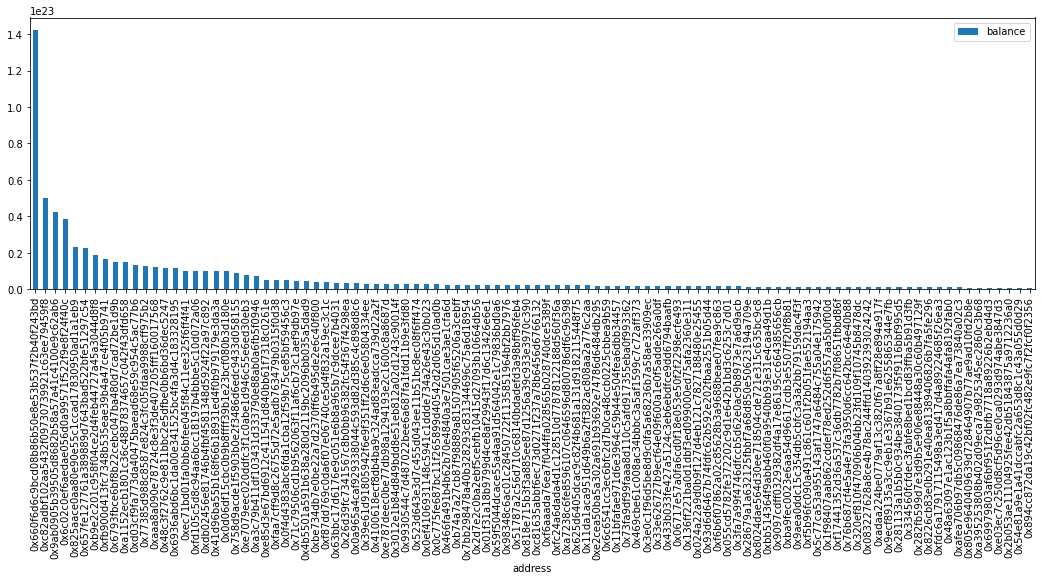

In [ ]:
total_df.plot.bar(x='address',y='balance', figsize=(18,5))

# Querying all members of a DAO

In [ ]:
import pandas as pd

In [ ]:

def fetch_token_holders(address, chain_id, params):

    url= f'https://api.covalenthq.com/v1/{chain_id}/tokens/{address}/token_holders/'

    r2 = requests.get(url, params)
    return r2.json()    




In [ ]:
params = {'quote-currency':'USD', 'page-size':'10000','key':key}
# page_json = fetch_token_holders('0x35bd01fc9d6d5d81ca9e055db88dc49aa2c699a8', 1, params)
# page_json = fetch_token_holders('0x35bd01fc9d6d5d81ca9e055db88dc49aa2c699a8', 1, params)
page_json = fetch_token_holders('0xd7d8f3b8bc8bc48d3acc37879eaba7b85889fa52', 1, params)

In [ ]:
len(page_json['data']['items'])

366

In [ ]:
def get_address_balance_df(holders):
    columns = ['address','balance']
    total_df = pd.DataFrame(columns=columns)

    for holder in holders['data']['items']:
        total_df = total_df.append(pd.DataFrame([[holder['address'], holder['balance']]], columns=columns))

    total_df.reset_index(drop=True, inplace=True)
    total_df['balance'] = total_df['balance'].astype('float')
    return total_df



In [ ]:
fwb_df = get_address_balance_df(page_json)

In [ ]:
fwb_df

address       balance
0    0x188a605073cf3b4c9616a5aacf35e0ab4e3dc817  4.263924e+26
1    0xbb813f286885f01ca5fb156c1bc6aa60aa5830aa  2.408029e+25
2    0x7275ea1b7010dbe088ded5b149220a83ee3bfbc2  2.051598e+25
3    0xf16e9b0d03470827a95cdfd0cb8a8a3b46969b91  1.677784e+25
4    0x7df5c99fa5a4a119282e40632118858e99163dca  1.079626e+25
..                                          ...           ...
361  0xf3b874d61a9ab0a40cc027fbdfdf6b52c8432e78  6.666700e+09
362  0x4b4b60f93266e9e4ebeee70d6a9ba9de82f74ddb  3.333500e+09
363  0x46b973323fb7694f5baa0643fd7fe9f82e04eb17  3.326743e+09
364  0xb6c823c310515775cea369976f92b4e689590dc7  3.335000e+08
365  0x8460970074ebe272f29e3232e8ea4b077c3b19b0  7.000000e+04

[366 rows x 2 columns]

In [ ]:
def fetch_wallet_tokens(address, chain_id, params):

    url = f'https://api.covalenthq.com/v1/{chain_id}/address/{address}/balances_v2/?&key=%s' % key

    r = requests.get(url, params)
    return r.json()


In [ ]:

from tqdm.auto import tqdm

In [ ]:
params = {'key':key}

all_token_holders_balance = {}

for row in tqdm(fwb_df.iterrows()):
    # print(row[1].address)
    all_token_holders_balance[row[1].address] = fetch_wallet_tokens(row[1].address, 1, params)


0it [00:00, ?it/s]

In [ ]:
all_token_holders_balance

{'0x000750f3974267e7ffeb103fad1a4fef22936d2e': {'data': {'address': '0x000750f3974267e7ffeb103fad1a4fef22936d2e',
   'chain_id': 1,
   'items': [{'balance': '417223355815160000000000',
     'balance_24h': '417223355815160000000000',
     'contract_address': '0xd7d8f3b8bc8bc48d3acc37879eaba7b85889fa52',
     'contract_decimals': 18,
     'contract_name': 'CLearingHouse Token',
     'contract_ticker_symbol': 'CLH',
     'last_transferred_at': '2022-04-08T02:50:28Z',
     'logo_url': 'https://logos.covalenthq.com/tokens/1/0xd7d8f3b8bc8bc48d3acc37879eaba7b85889fa52.png',
     'nft_data': None,
     'quote': 17523.43,
     'quote_24h': 16809.926,
     'quote_rate': 0.04200012,
     'quote_rate_24h': 0.04028999,
     'supports_erc': ['erc20'],
     'type': 'cryptocurrency'},
    {'balance': '0',
     'balance_24h': '0',
     'contract_address': '0xeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeee',
     'contract_decimals': 18,
     'contract_name': 'Ether',
     'contract_ticker_symbol': 'ETH',
    

In [ ]:
with open('token_holders_balance2.json','w') as json_file:
    json.dump(all_token_holders_balance, json_file)


In [ ]:
print(len(all_token_holders_balance))

366


In [ ]:
holder_columns = ['address','contract_ticker_symbol', 'balance', 'quote', 'contract_decimals', 'contract_address', 'contract_name']

dao_power = pd.DataFrame(columns = holder_columns)

for k,v in tqdm(all_token_holders_balance.items()):
    if v['data'] is not None:
        for token_dict in v['data']['items']:
            this_dict = {k:v for k,v in token_dict.items() if k in holder_columns}
            this_dict['address'] = k
            dao_power = dao_power.append(pd.DataFrame.from_dict(this_dict, orient='index').T)

  0%|          | 0/366 [00:00<?, ?it/s]

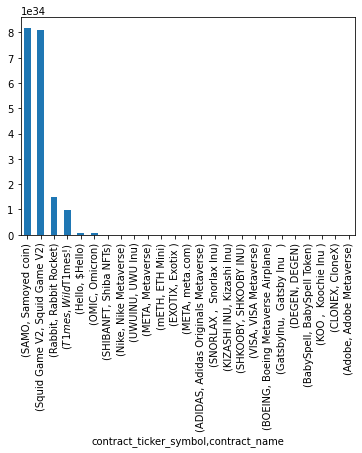

In [ ]:
dao_power.groupby(['contract_ticker_symbol','contract_name'])['quote'].sum().sort_values(ascending=False).head(25).plot.bar()

In [ ]:
dao_power.to_csv('dao_power2.csv', index=False)